In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sp

In [2]:
Stocks = data = pd.read_csv('C:/Users/FultonRose/Downloads/portfolio-optimisation-main/portfolio-optimisation-main/dataset with 10 funds.csv')
Stocks.head()
Stocks.reset_index(drop=True, inplace=True)
Stocks=pd.DataFrame(Stocks)
datetime_series = pd.to_datetime(Stocks['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Stocks=Stocks.set_index(datetime_index)
Stocks.drop('Date',axis=1,inplace=True)
Stocks.index = pd.to_datetime(Stocks.index)
Stocks.head()
# help(pd.read_excel)

,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,BBFTOP3 KY Equity,CRLCBUU LX Equity,BCUSDLF KK Equity,PGPGIFA ID Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,BUTIBLI KY Equity
2020-04-17,16.6991,112.35,2.5766,1275.83,10.69,10.76,1.201,114.32,116.33,29.97
2020-04-24,16.8738,112.35,2.5808,1276.46,10.69,10.77,1.201,114.32,117.05,29.32
2020-01-05,16.6996,112.33,2.5811,1276.78,10.68,10.77,1.203,114.97,116.80,30.00
2020-08-05,16.8233,112.33,2.5871,1278.59,10.71,10.77,1.204,114.97,116.74,29.84
2020-05-15,16.9853,112.33,2.5927,1279.82,10.68,10.78,1.212,115.36,117.38,29.95


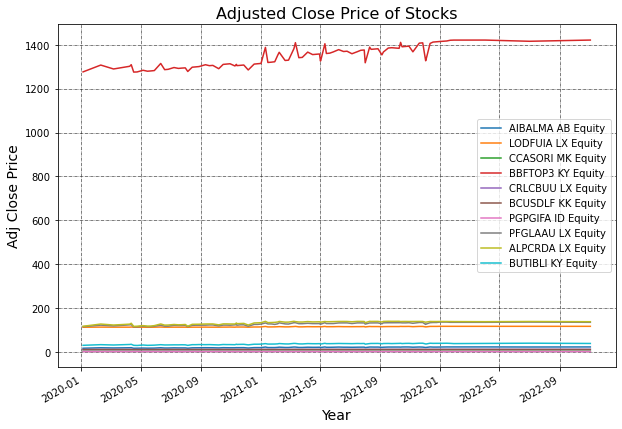

In [3]:
# Plot the adjusted close price
Stocks.plot(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of Stocks" % Stocks, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Adj Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

# Log of percentage change of all stocks in the list

In [4]:
Ret= Stocks.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.tail()

,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,BBFTOP3 KY Equity,CRLCBUU LX Equity,BCUSDLF KK Equity,PGPGIFA ID Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,BUTIBLI KY Equity
2022-01-14,0.016364,0.0,0.003360,0.000953,-0.000859,0.0,-0.002225,0.000000,-0.000289,-0.005821
2022-01-21,-0.004237,0.0,0.003281,0.002346,0.000859,0.0,0.000000,-0.007609,-0.001155,-0.015088
2022-01-28,0.000644,0.0,-0.001115,0.000500,0.000859,0.0,-0.000743,0.000000,-0.001229,-0.025576
2022-04-02,0.005215,0.0,-0.000643,0.000063,0.000858,0.0,-0.000743,0.000000,-0.003479,0.019113
2022-11-02,-0.003313,0.0,0.005028,0.000042,-0.000858,0.0,-0.000744,0.000000,-0.000944,-0.004158


<AxesSubplot:title={'center':'Stocks daily returns'}>

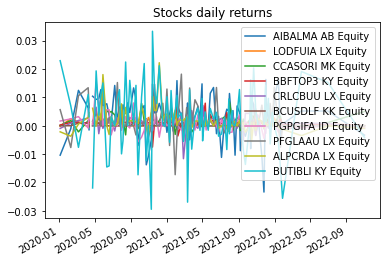

In [5]:
Ret.plot(title='Stocks daily returns')

# Calculating the Mean, standard deviation and other stats

In [6]:
Ann_Ret = Ret.mean()*52
print(Ann_Ret)

AIBALMA AB Equity    0.164994
LODFUIA LX Equity    0.020183
CCASORI MK Equity    0.077905
BBFTOP3 KY Equity    0.059322
CRLCBUU LX Equity    0.047072
BCUSDLF KK Equity    0.007076
PGPGIFA ID Equity    0.061577
PFGLAAU LX Equity    0.090445
ALPCRDA LX Equity    0.091994
BUTIBLI KY Equity    0.135671
dtype: float64


In [7]:
Ann_Risk = Ret.std()*(52)**(0.5)
print(Ann_Risk)

AIBALMA AB Equity    0.052010
LODFUIA LX Equity    0.006843
CCASORI MK Equity    0.016388
BBFTOP3 KY Equity    0.011316
CRLCBUU LX Equity    0.017065
BCUSDLF KK Equity    0.002373
PGPGIFA ID Equity    0.022152
PFGLAAU LX Equity    0.039963
ALPCRDA LX Equity    0.027841
BUTIBLI KY Equity    0.080982
dtype: float64


# Calculating the correlation and covariance

In [8]:
Ret_Covar = Ret.cov()
print(Ret_Covar)

                   AIBALMA AB Equity  LODFUIA LX Equity  CCASORI MK Equity  \
AIBALMA AB Equity       5.201934e-05       3.937103e-07       4.462164e-06   
LODFUIA LX Equity       3.937103e-07       9.006414e-07      -7.683445e-07   
CCASORI MK Equity       4.462164e-06      -7.683445e-07       5.164686e-06   
BBFTOP3 KY Equity      -6.997817e-09       2.189383e-07       4.558075e-08   
CRLCBUU LX Equity       2.834879e-07      -2.465525e-07       4.825812e-07   
BCUSDLF KK Equity       2.804106e-07      -1.959935e-08       1.870341e-08   
PGPGIFA ID Equity       5.832823e-06      -7.329275e-08       5.748516e-07   
PFGLAAU LX Equity       1.177909e-07      -3.012736e-07       2.763139e-07   
ALPCRDA LX Equity       5.375880e-06      -1.403663e-08      -1.117566e-07   
BUTIBLI KY Equity       1.693858e-05       6.445914e-07       1.041013e-06   

                   BBFTOP3 KY Equity  CRLCBUU LX Equity  BCUSDLF KK Equity  \
AIBALMA AB Equity      -6.997817e-09       2.834879e-07       2

In [9]:
Ret_Corr = Ret.corr()
print(Ret_Corr)

                   AIBALMA AB Equity  LODFUIA LX Equity  CCASORI MK Equity  \
AIBALMA AB Equity           1.000000           0.057520           0.272233   
LODFUIA LX Equity           0.057520           1.000000          -0.356253   
CCASORI MK Equity           0.272233          -0.356253           1.000000   
BBFTOP3 KY Equity          -0.000618           0.147011           0.012781   
CRLCBUU LX Equity           0.016609          -0.109779           0.089729   
BCUSDLF KK Equity           0.118154          -0.062763           0.025011   
PGPGIFA ID Equity           0.263260          -0.025140           0.082342   
PFGLAAU LX Equity           0.002947          -0.057284           0.021940   
ALPCRDA LX Equity           0.193055          -0.003831          -0.012737   
BUTIBLI KY Equity           0.209127           0.060482           0.040790   

                   BBFTOP3 KY Equity  CRLCBUU LX Equity  BCUSDLF KK Equity  \
AIBALMA AB Equity          -0.000618           0.016609        

# Creation of portfolio

In [10]:
# Log of percentage change and create Covariance matrix
cov_matrix = Stocks.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,BBFTOP3 KY Equity,CRLCBUU LX Equity,BCUSDLF KK Equity,PGPGIFA ID Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,BUTIBLI KY Equity
AIBALMA AB Equity,5.201934e-05,3.937103e-07,4.462164e-06,-6.997817e-09,2.834879e-07,2.804106e-07,5.832823e-06,1.177909e-07,5.375880e-06,1.693858e-05
LODFUIA LX Equity,3.937103e-07,9.006414e-07,-7.683445e-07,2.189383e-07,-2.465525e-07,-1.959935e-08,-7.329275e-08,-3.012736e-07,-1.403663e-08,6.445914e-07
CCASORI MK Equity,4.462164e-06,-7.683445e-07,5.164686e-06,4.558075e-08,4.825812e-07,1.870341e-08,5.748516e-07,2.763139e-07,-1.117566e-07,1.041013e-06
BBFTOP3 KY Equity,-6.997817e-09,2.189383e-07,4.558075e-08,2.462584e-06,3.879191e-07,-1.967282e-08,-3.308211e-07,-4.210615e-07,-9.380534e-07,-2.354613e-06
CRLCBUU LX Equity,2.834879e-07,-2.465525e-07,4.825812e-07,3.879191e-07,5.600535e-06,2.600089e-08,7.652617e-07,7.854867e-07,-1.113672e-06,-1.939311e-06
BCUSDLF KK Equity,2.804106e-07,-1.959935e-08,1.870341e-08,-1.967282e-08,2.600089e-08,1.082739e-07,2.463935e-07,7.856294e-08,1.023685e-07,-8.323661e-08
PGPGIFA ID Equity,5.832823e-06,-7.329275e-08,5.748516e-07,-3.308211e-07,7.652617e-07,2.463935e-07,9.436773e-06,-1.086948e-07,-5.335569e-07,6.396113e-06
PFGLAAU LX Equity,1.177909e-07,-3.012736e-07,2.763139e-07,-4.210615e-07,7.854867e-07,7.856294e-08,-1.086948e-07,3.071178e-05,4.369781e-06,1.136959e-05
ALPCRDA LX Equity,5.375880e-06,-1.403663e-08,-1.117566e-07,-9.380534e-07,-1.113672e-06,1.023685e-07,-5.335569e-07,4.369781e-06,1.490646e-05,1.461637e-05
BUTIBLI KY Equity,1.693858e-05,6.445914e-07,1.041013e-06,-2.354613e-06,-1.939311e-06,-8.323661e-08,6.396113e-06,1.136959e-05,1.461637e-05,1.261157e-04


In [11]:
corr_matrix = Stocks.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,BBFTOP3 KY Equity,CRLCBUU LX Equity,BCUSDLF KK Equity,PGPGIFA ID Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,BUTIBLI KY Equity
AIBALMA AB Equity,1.000000,0.057520,0.272233,-0.000618,0.016609,0.118154,0.263260,0.002947,0.193055,0.209127
LODFUIA LX Equity,0.057520,1.000000,-0.356253,0.147011,-0.109779,-0.062763,-0.025140,-0.057284,-0.003831,0.060482
CCASORI MK Equity,0.272233,-0.356253,1.000000,0.012781,0.089729,0.025011,0.082342,0.021940,-0.012737,0.040790
BBFTOP3 KY Equity,-0.000618,0.147011,0.012781,1.000000,0.104455,-0.038099,-0.068626,-0.048417,-0.154826,-0.133610
CRLCBUU LX Equity,0.016609,-0.109779,0.089729,0.104455,1.000000,0.033390,0.105265,0.059892,-0.121886,-0.072971
BCUSDLF KK Equity,0.118154,-0.062763,0.025011,-0.038099,0.033390,1.000000,0.243756,0.043083,0.080578,-0.022525
PGPGIFA ID Equity,0.263260,-0.025140,0.082342,-0.068626,0.105265,0.243756,1.000000,-0.006385,-0.044986,0.185404
PFGLAAU LX Equity,0.002947,-0.057284,0.021940,-0.048417,0.059892,0.043083,-0.006385,1.000000,0.204230,0.182687
ALPCRDA LX Equity,0.193055,-0.003831,-0.012737,-0.154826,-0.121886,0.080578,-0.044986,0.204230,1.000000,0.337107
BUTIBLI KY Equity,0.209127,0.060482,0.040790,-0.133610,-0.072971,-0.022525,0.185404,0.182687,0.337107,1.000000


In [12]:
return_risk_ratio = (Ann_Ret/Ann_Risk)
assets = pd.concat([Ann_Ret, Ann_Risk, return_risk_ratio], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility','Returns to Risk']
assets

,Returns,Volatility,Returns to Risk
AIBALMA AB Equity,0.164994,0.052010,3.172365
LODFUIA LX Equity,0.020183,0.006843,2.949239
CCASORI MK Equity,0.077905,0.016388,4.753824
BBFTOP3 KY Equity,0.059322,0.011316,5.242223
CRLCBUU LX Equity,0.047072,0.017065,2.758347
BCUSDLF KK Equity,0.007076,0.002373,2.982097
PGPGIFA ID Equity,0.061577,0.022152,2.779728
PFGLAAU LX Equity,0.090445,0.039963,2.263234
ALPCRDA LX Equity,0.091994,0.027841,3.304219
BUTIBLI KY Equity,0.135671,0.080982,1.675332


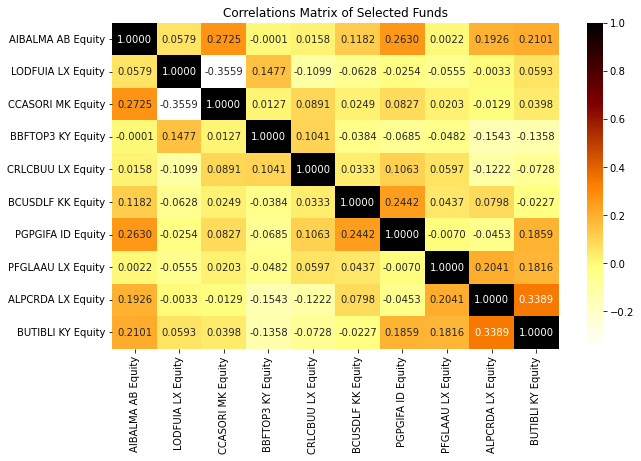

In [13]:
fig,ax = plt.subplots(figsize= (10,6))
sp.heatmap(Stocks.pct_change().corr(method = 'pearson'), ax=ax, cmap='afmhot_r', annot=True, fmt=".4f")
#spearman
ax.set_title('Correlations Matrix of Selected Funds')
plt.show('images/chart1')

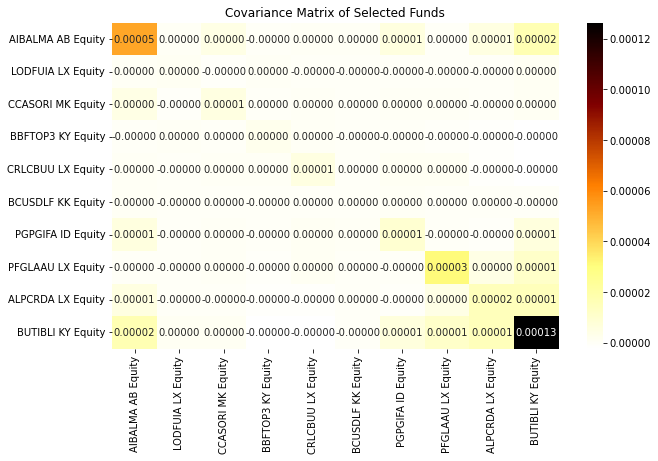

In [14]:
fig,ax = plt.subplots(figsize= (10,6))
sp.heatmap(Stocks.pct_change().cov(), ax=ax, cmap='afmhot_r', annot=True, fmt=".5f")
#spearman
ax.set_title('Covariance Matrix of Selected Funds')
plt.show('images/chart1')

In [15]:
# Yearly returns for individual companies
ind_er = Stocks.resample('Y').last().pct_change().mean()
ind_er

AIBALMA AB Equity    0.076369
LODFUIA LX Equity    0.013253
CCASORI MK Equity    0.038140
BBFTOP3 KY Equity    0.040926
CRLCBUU LX Equity    0.022385
BCUSDLF KK Equity    0.002768
PGPGIFA ID Equity    0.021034
PFGLAAU LX Equity    0.038815
ALPCRDA LX Equity    0.019602
BUTIBLI KY Equity    0.049820
dtype: float64

In [16]:
# Randomly weighted portfolio's variance
w = [1/10]*10 
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*52)**(0.5)
print (port_var)
print (port_var*252)

3.8092019275372796e-06
0.0009599188857393944


In [17]:
Ann_port_std

0.014074036387331764

In [18]:
# Yearly returns for individual companies
ind_er = Stocks.resample('Y').last().pct_change().mean()
ind_er

AIBALMA AB Equity    0.076369
LODFUIA LX Equity    0.013253
CCASORI MK Equity    0.038140
BBFTOP3 KY Equity    0.040926
CRLCBUU LX Equity    0.022385
BCUSDLF KK Equity    0.002768
PGPGIFA ID Equity    0.021034
PFGLAAU LX Equity    0.038815
ALPCRDA LX Equity    0.019602
BUTIBLI KY Equity    0.049820
dtype: float64

In [20]:
# Portfolio returns
w = [1/10]*10
port_er = (w*Ann_Ret).sum()
port_er

0.07562378791735364

In [21]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/ye
ann_sd = Stocks.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

AIBALMA AB Equity    0.114494
LODFUIA LX Equity    0.015065
CCASORI MK Equity    0.036076
BBFTOP3 KY Equity    0.024911
CRLCBUU LX Equity    0.037568
BCUSDLF KK Equity    0.005224
PGPGIFA ID Equity    0.048765
PFGLAAU LX Equity    0.087974
ALPCRDA LX Equity    0.061290
BUTIBLI KY Equity    0.178273
dtype: float64

In [22]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets


,Returns,Volatility
AIBALMA AB Equity,0.076369,0.114494
LODFUIA LX Equity,0.013253,0.015065
CCASORI MK Equity,0.038140,0.036076
BBFTOP3 KY Equity,0.040926,0.024911
CRLCBUU LX Equity,0.022385,0.037568
BCUSDLF KK Equity,0.002768,0.005224
PGPGIFA ID Equity,0.021034,0.048765
PFGLAAU LX Equity,0.038815,0.087974
ALPCRDA LX Equity,0.019602,0.061290
BUTIBLI KY Equity,0.049820,0.178273


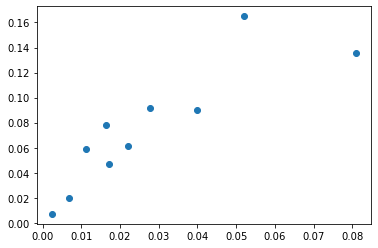

In [23]:
import matplotlib.pyplot as plt
x = Ann_Risk # RISK
y = Ann_Ret # Return
plt.scatter(x, y)
plt.show()

In [24]:
#creating portfolios random n =10000
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(Stocks.columns)
num_portfolios = 10000
#explain

In [25]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, Ann_Ret) # Returns are the product of individual expected returns of asset and its
    # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(52) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [26]:
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(Stocks.columns.tolist()):
 #print(counter, symbol)
 data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created
#explain

,Returns,Volatility,AIBALMA AB Equity weight,LODFUIA LX Equity weight,CCASORI MK Equity weight,BBFTOP3 KY Equity weight,CRLCBUU LX Equity weight,BCUSDLF KK Equity weight,PGPGIFA ID Equity weight,PFGLAAU LX Equity weight,ALPCRDA LX Equity weight,BUTIBLI KY Equity weight
0,0.075217,0.017082,0.058761,0.043475,0.023679,0.171125,0.093707,0.132646,0.115811,0.035191,0.164621,0.160985
1,0.075022,0.014520,0.039086,0.044165,0.119451,0.087379,0.085999,0.107928,0.095206,0.177113,0.150201,0.093474
2,0.086107,0.017860,0.171507,0.062517,0.020881,0.152066,0.141779,0.079076,0.039214,0.038993,0.163882,0.130085
3,0.080486,0.013058,0.182317,0.124067,0.154956,0.189381,0.166029,0.000979,0.054764,0.012749,0.076069,0.038688
4,0.073056,0.017316,0.109928,0.198237,0.087469,0.060878,0.006285,0.168706,0.049581,0.107136,0.056621,0.155160


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

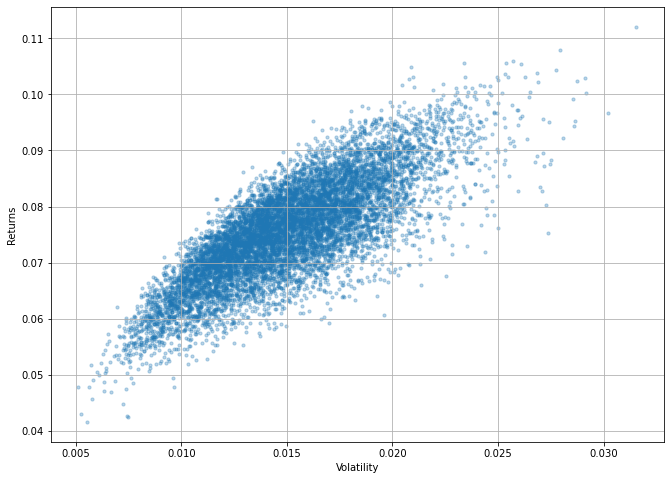

In [27]:
# Plot the returns and risks of the 10000 portfolios
x=Ann_Risk
y=Ann_Ret
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[11,8])

In [28]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
#gives portfolio with min value of risk
min_vol_port

Returns                     0.047798
Volatility                  0.005132
AIBALMA AB Equity weight    0.009331
LODFUIA LX Equity weight    0.237775
CCASORI MK Equity weight    0.142781
BBFTOP3 KY Equity weight    0.261745
CRLCBUU LX Equity weight    0.073962
BCUSDLF KK Equity weight    0.169919
PGPGIFA ID Equity weight    0.006698
PFGLAAU LX Equity weight    0.043677
ALPCRDA LX Equity weight    0.036147
BUTIBLI KY Equity weight    0.017964
Name: 3237, dtype: float64

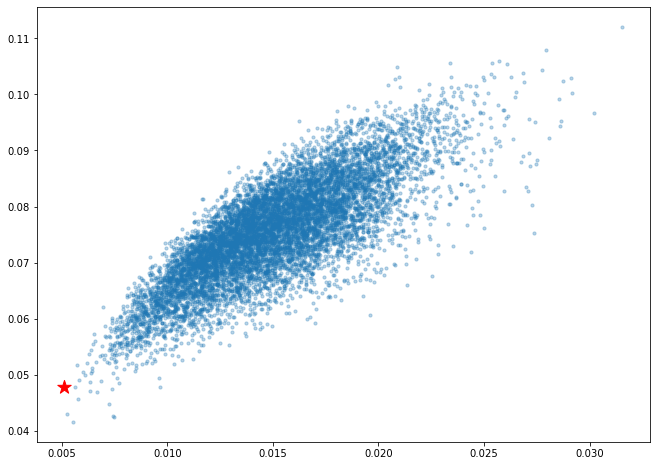

In [29]:
# plotting the minimum volatility portfolio with max return associated with the min amount of risk
plt.subplots(figsize=[11,8])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [30]:
# Finding the optimal portfolio
rf = 0.05 # risk factor, risk aversion factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port
#max (Return - risk factor / risk)

Returns                     0.086086
Volatility                  0.012931
AIBALMA AB Equity weight    0.118722
LODFUIA LX Equity weight    0.044201
CCASORI MK Equity weight    0.221232
BBFTOP3 KY Equity weight    0.204959
CRLCBUU LX Equity weight    0.003092
BCUSDLF KK Equity weight    0.003094
PGPGIFA ID Equity weight    0.081561
PFGLAAU LX Equity weight    0.107562
ALPCRDA LX Equity weight    0.182097
BUTIBLI KY Equity weight    0.033478
Name: 3199, dtype: float64

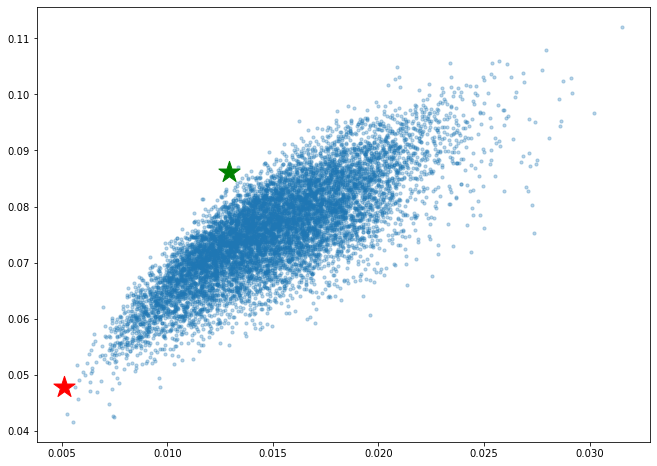

In [31]:
# Plotting optimal portfolio
plt.subplots(figsize=(11, 8))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)